In [1]:
import practicalSPARQL
import pandas as pd
import ast
import matplotlib.pyplot as plt

In [2]:
root_q = 'queries'
root_d = 'results'

# read login data
login = pd.read_json('config_sparql.json')
ENDPOINT = login['endpoint'][0]
USERNAME = login['username'][0]
PASSWORD = login['password'][0]

# create sparql object
sparql = practicalSPARQL.practicalWrapper(ENDPOINT)
sparql.setCredentials(USERNAME, PASSWORD)

print("--- Querying ENDPOINT: {} ---".format(ENDPOINT))

--- Querying ENDPOINT: http://devmeta.sphaera.mpiwg-berlin.mpg.de/sparql ---


In [3]:
q = practicalSPARQL.stringify_SPARQL('elements_query_050824.sparql')    # select data from the ttl file as a dataframe
df = sparql.select_as_dataframe(q)

In [4]:
# List of keywords to include
keywords = [
    'CK_Poles of the World',
    'CK_Zodiac',
    'CK_Colures',
    'CK_Equinoctial',
    'CK_Horizon',
    'CK_Meridian',
    'CK_Tropics',
    'CK_Polar Circles',
    'CK_Parallels',
    'CK_Multiple Celestial Circles'
]

# Combine keywords into a single pattern string
pattern = '|'.join([fr'\b{keyword}\b' for keyword in keywords])

# Filter the DataFrame
celestial_circles = df[df['cks'].str.contains(pattern, case=False, na=False)]

celestial_circles = celestial_circles[['images', 'cluster_name', 'cks', 'bid', 'custom_identifier', 'year', 'place']]
celestial_circles.rename(columns={'custom_identifier': 'part_id'}, inplace=True)

celestial_circles

,images,cluster_name,cks,bid,part_id,year,place
8,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00554,CK_Multiple Celestial Circles,1626,100,1494,Leipzig
35,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01833,"CK_Poles of the world, CK_Equinoctial",1622,329,1494,Venice
52,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00658,CK_Multiple Celestial Circles,1622,329,1494,Venice
62,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01158,"CK_Horizon, CK_Right and Oblique Sphere",1622,329,1494,Venice
158,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00554,CK_Multiple Celestial Circles,1632,100,1498,Leipzig
...,...,...,...,...,...,...,...
20803,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01709,CK_Zodiac,2271,503,1576,Wittenberg
20804,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00197,CK_Equinoctial,2271,503,1576,Wittenberg
20809,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_01611,"CK_Five Zones, CK_Terraqueous Globe, CK_Parallels",2271,503,1576,Wittenberg
20810,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00965,CK_Colures,2271,503,1576,Wittenberg


In [5]:
count_unique = celestial_circles['cluster_name'].nunique()
print(f"Unique values count: {count_unique}")

Unique values count: 261


In [6]:
count_unique = celestial_circles['images'].nunique()
print(f"Unique values count: {count_unique}")

Unique values count: 2331


In [7]:
# Keywords to exclude
exclude_keywords = ['CK_Meridian Dial', 'CK_Zodiac man']

# Function to check if any of the exclude keywords are present in the row
def contains_exclude_keyword(row, exclude_keywords):
    return any(keyword in row for keyword in exclude_keywords)

# Filter out rows that contain any of the exclude keywords
celestial_circles = celestial_circles[~celestial_circles['cks'].apply(lambda x: contains_exclude_keyword(x, exclude_keywords))]

In [8]:
count_unique = celestial_circles['cluster_name'].nunique()
print(f"Unique values count: {count_unique}")

Unique values count: 241


In [9]:
count_unique = celestial_circles['images'].nunique()
print(f"Unique values count: {count_unique}")

Unique values count: 2294


In [10]:
#unique_values = celestial_circles['cluster_name'].unique()
#unique_df = pd.DataFrame(unique_values, columns=['cluster_name'])
#unique_df.to_excel('corrected_celestial_circles.xlsx', index=False, sheet_name='Sheet1')

In [11]:
q = practicalSPARQL.stringify_SPARQL('books_query.sparql')    # select data from the ttl file as a dataframe
books = sparql.select_as_dataframe(q)

In [12]:
books

,book,label,bid,authors,publishers,printers,place,year,num_pages
0,http://sphaera.mpiwg-berlin.mpg.de/id/item/91f...,Sphaerae mundi compendium foeliciter inchoat,1925,"Regiomontanus, Johannes;Sacrobosco, Johannes d...","Scoto I., Ottaviano","Locatello, Boneto",Venice,1490,94
1,http://sphaera.mpiwg-berlin.mpg.de/id/item/99a...,Syderei indagatoris Michaelis scoti super auct...,1944,"Scot, Michael","Rubiera, Giustiniano da","Rubiera, Giustiniano da",Bologna,1495,89
2,http://sphaera.mpiwg-berlin.mpg.de/id/item/9a5...,Tractatus de Sphera,1621,"Sacrobosco, Johannes de;Peurbach, Georg von;Re...","Baligault, Félix","Baligault, Félix",Paris,1493,22
3,http://sphaera.mpiwg-berlin.mpg.de/id/item/b49...,Sphaera mundi,1926,"Peurbach, Georg von;Regiomontanus, Johannes;Sa...","Trino, Guglielmo da","Trino, Guglielmo da",Venice,1491,96
4,http://sphaera.mpiwg-berlin.mpg.de/id/item/b63...,Opusculum Iohannis de Sacro Busto spericum,1626,"Sacrobosco, Johannes de","Landsberg, Martin","Landsberg, Martin",Leipzig,1494,86
...,...,...,...,...,...,...,...,...,...
354,http://sphaera.mpiwg-berlin.mpg.de/id/item/c55...,La Sphere de Iean de Sacrobosco,1758,"Sacrobosco, Johannes de",Widow of Guillaume Cavellat (Denise de Marnef),Widow of Guillaume Cavellat (Denise de Marnef),Paris,1616,61
355,http://sphaera.mpiwg-berlin.mpg.de/id/item/cb8...,Sphaera Ioannis de Sacrobosco,1872,"Valeriano, Pierio;Martin, Jacques;Sacrobosco, ...","Pillehotte, Antoine","Pillehotte, Antoine",Lyon,1617,212
356,http://sphaera.mpiwg-berlin.mpg.de/id/item/cc5...,"De Sphaera, et primis astronomiae rudimentis",2177,"Blebel, Thomas","Krafft, Johann","Krafft, Johann",Wittenberg,1590,243
357,http://sphaera.mpiwg-berlin.mpg.de/id/item/d52...,"De sphaera, et primis astronomiae rudimentis",2182,"Blebel, Thomas","Krafft, Johann","Krafft, Johann",Wittenberg,1603,237


C:\Users\nogas\AppData\Local\Temp\ipykernel_2740\277550646.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_2740\277550646.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_books_per_interval = books.groupby('interval')['book'].nunique().reset_index()


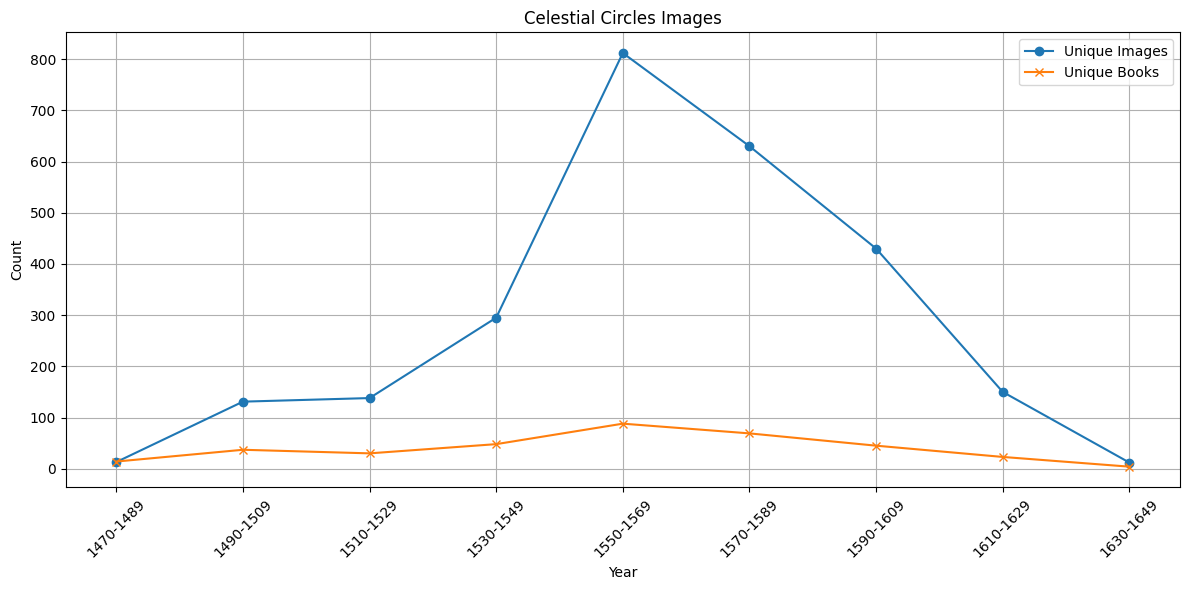

In [13]:
#plot the number of celestial circles images in comparison to the number of books

# Ensure the year column is of integer type
df['year'] = df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the images DataFrame
df['interval'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Define keywords
keywords = [
    'CK_Poles of the World', 'CK_Zodiac', 'CK_Colures', 'CK_Equinoctial',
    'CK_Horizon', 'CK_Meridian', 'CK_Tropics', 'CK_Polar Circles',
    'CK_Parallels', 'CK_Multiple Celestial Circles', 'CK_Armillary Sphere'
]

# Create a boolean mask for the keywords
mask = df['cks'].apply(lambda x: any(keyword in x for keyword in keywords))

# Filter the DataFrame based on the mask
filtered_df = df[mask]

# Count unique images per interval
unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
unique_images_per_interval.columns = ['interval', 'unique_images']

# Count unique books per interval
unique_books_per_interval = books.groupby('interval')['book'].nunique().reset_index()
unique_books_per_interval.columns = ['interval', 'unique_books']

# Merge the two DataFrames on 'interval'
merged_df = pd.merge(unique_images_per_interval, unique_books_per_interval, on='interval', how='outer')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(merged_df['interval'], merged_df['unique_images'], label='Unique Images', marker='o')
plt.plot(merged_df['interval'], merged_df['unique_books'], label='Unique Books', marker='x')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Celestial Circles Images')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_2740\3263402056.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celestial_circles['year'] = celestial_circles['year'].astype(int)
C:\Users\nogas\AppData\Local\Temp\ipykernel_2740\3263402056.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celestial_circles['interval'] = pd.cut(celestial_circles['year'], bins=bins, labels=labels, right=False)
C:\Users\nogas\AppData\Local\Temp\ipykernel_2740\3263402056.py:16: FutureWarning: The default of observed=False is d

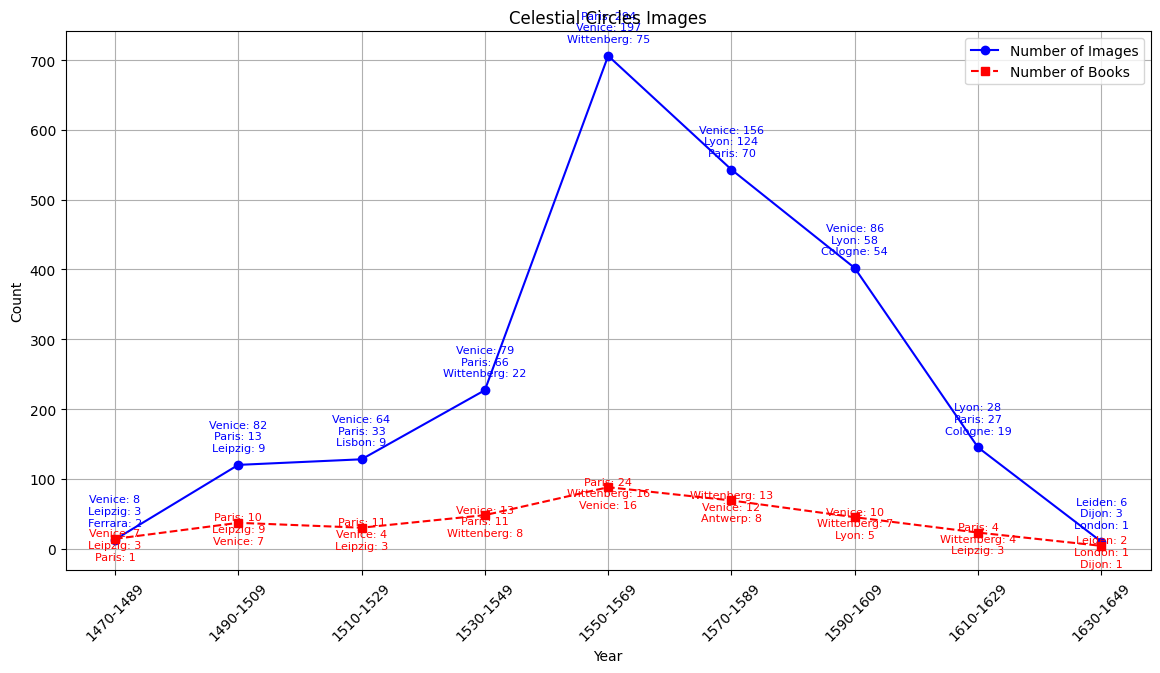

In [14]:
#celestial circles images in comparison to books with city names

# Ensure the 'year' column is of type int
celestial_circles['year'] = celestial_circles['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals in both DataFrames
celestial_circles['interval'] = pd.cut(celestial_circles['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Group by interval and count unique images
unique_images = celestial_circles.groupby('interval')['images'].nunique()

# Group by interval and count the number of books
books_count = books.groupby('interval').size()

# Function to get the top three places with the most unique images for each interval
def get_top_places_per_interval(interval):
    interval_df = celestial_circles[celestial_circles['interval'] == interval]
    top_places = interval_df.groupby('place')['images'].nunique().nlargest(3)
    return top_places

# Function to get the most common places for each interval in the books DataFrame
def get_most_common_places_per_interval(interval):
    interval_df = books[books['interval'] == interval]
    most_common_places = interval_df['place'].value_counts().head(3)
    return most_common_places

# Plot the results
plt.figure(figsize=(14, 7))

# Plot unique images by interval
plt.plot(unique_images.index, unique_images.values, marker='o', linestyle='-', color='blue', label='Number of Images')

# Plot number of books by interval
plt.plot(books_count.index, books_count.values, marker='s', linestyle='--', color='red', label='Number of Books')

# Add annotations for the top three places for unique images
for interval in labels:
    if interval in unique_images.index:
        top_places = get_top_places_per_interval(interval)
        annotation_text = '\n'.join([f'{place}: {count}' for place, count in top_places.items()])
        
        # Get the y-value for annotation
        unique_image_count = unique_images.loc[interval]
                
        # Annotation for unique images line
        plt.annotate(annotation_text, (interval, unique_image_count), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='blue')

# Add annotations for the most common places for books
for interval in labels:
    if interval in books_count.index:
        common_places = get_most_common_places_per_interval(interval)
        annotation_text = '\n'.join([f'{place}: {count}' for place, count in common_places.items()])
        
        # Get the y-value for annotation
        book_count = books_count.loc[interval]
                
        # Annotation for books line
        plt.annotate(annotation_text, (interval, book_count), textcoords="offset points", xytext=(0, -15), ha='center', fontsize=8, color='red')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Celestial Circles Images')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_2740\1280235320.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_2740\1280235320.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_2740\1280235320.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=F

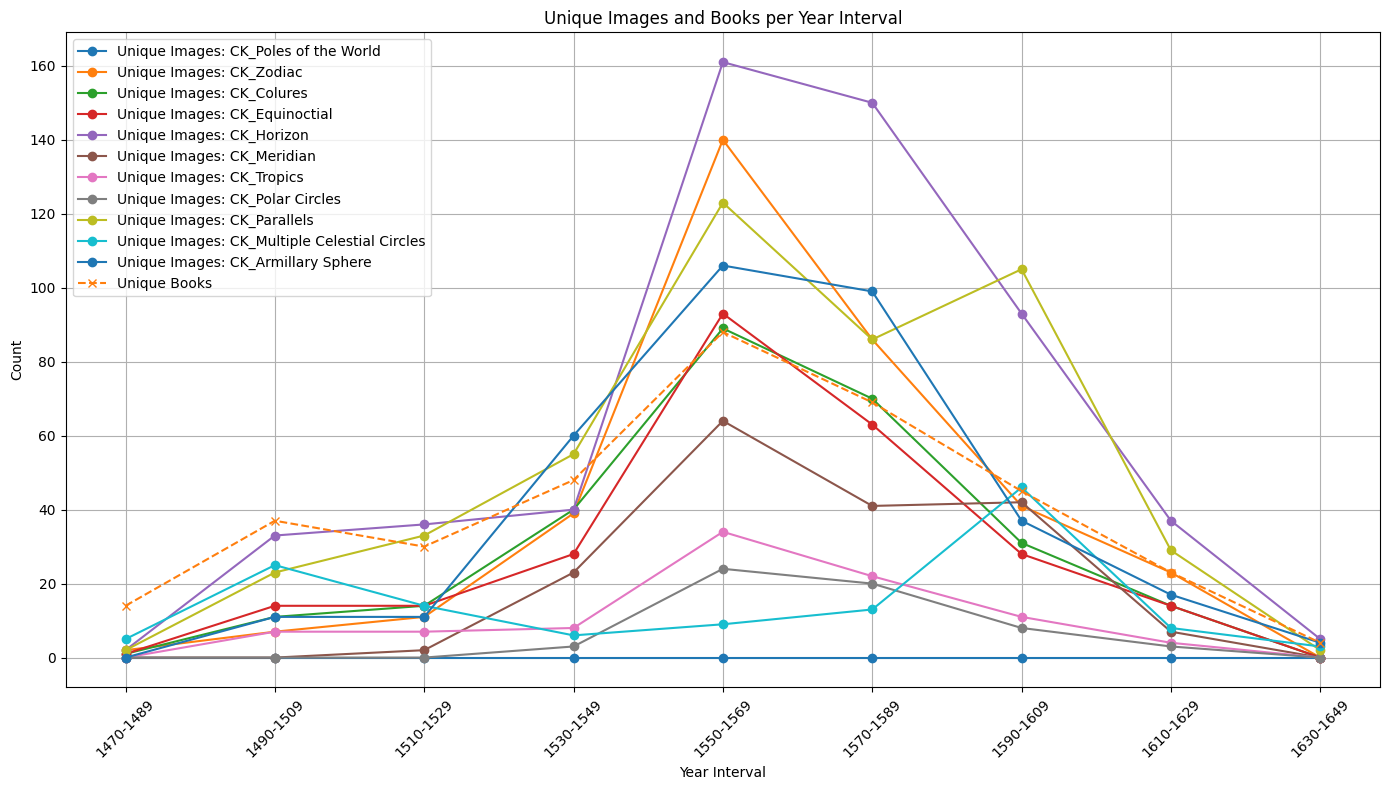

In [15]:
#comparison of different content keywords in celestial circles df

#including armillary sphere images: but only those included in these content groups! there is a big difference from all the armillary sphere content group that comes from other contexts as well.

# Ensure the year column is of integer type
df['year'] = df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the images DataFrame
df['interval'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Define keywords
keywords = [
    'CK_Poles of the World', 'CK_Zodiac', 'CK_Colures', 'CK_Equinoctial',
    'CK_Horizon', 'CK_Meridian', 'CK_Tropics', 'CK_Polar Circles',
    'CK_Parallels', 'CK_Multiple Celestial Circles', 'CK_Armillary Sphere'
]

# Prepare a DataFrame for each keyword
keyword_dfs = {}
for keyword in keywords:
    # Create a boolean mask for the keyword
    mask = df['cks'].apply(lambda x: keyword in x)
    
    # Filter the DataFrame based on the mask
    filtered_df = df[mask]
    
    # Count unique images per interval for this keyword
    unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
    unique_images_per_interval.columns = ['interval', f'unique_images_{keyword}']
    
    keyword_dfs[keyword] = unique_images_per_interval

# Merge all keyword DataFrames on 'interval'
merged_keyword_df = pd.merge(keyword_dfs[keywords[0]], keyword_dfs[keywords[1]], on='interval', how='outer')
for keyword in keywords[2:]:
    merged_keyword_df = pd.merge(merged_keyword_df, keyword_dfs[keyword], on='interval', how='outer')

# Count unique books per interval
unique_books_per_interval = books.groupby('interval')['book'].nunique().reset_index()
unique_books_per_interval.columns = ['interval', 'unique_books']

# Merge the keyword DataFrame with the books DataFrame
final_df = pd.merge(merged_keyword_df, unique_books_per_interval, on='interval', how='outer')

# Plot the results
plt.figure(figsize=(14, 8))

# Plot each keyword
for keyword in keywords:
    plt.plot(final_df['interval'], final_df[f'unique_images_{keyword}'], label=f'Unique Images: {keyword}', marker='o')

# Plot unique books
plt.plot(final_df['interval'], final_df['unique_books'], label='Unique Books', marker='x', linestyle='--')

plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.title('Unique Images and Books per Year Interval')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_2740\331949934.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_2740\331949934.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_2740\331949934.py:48: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=Fals

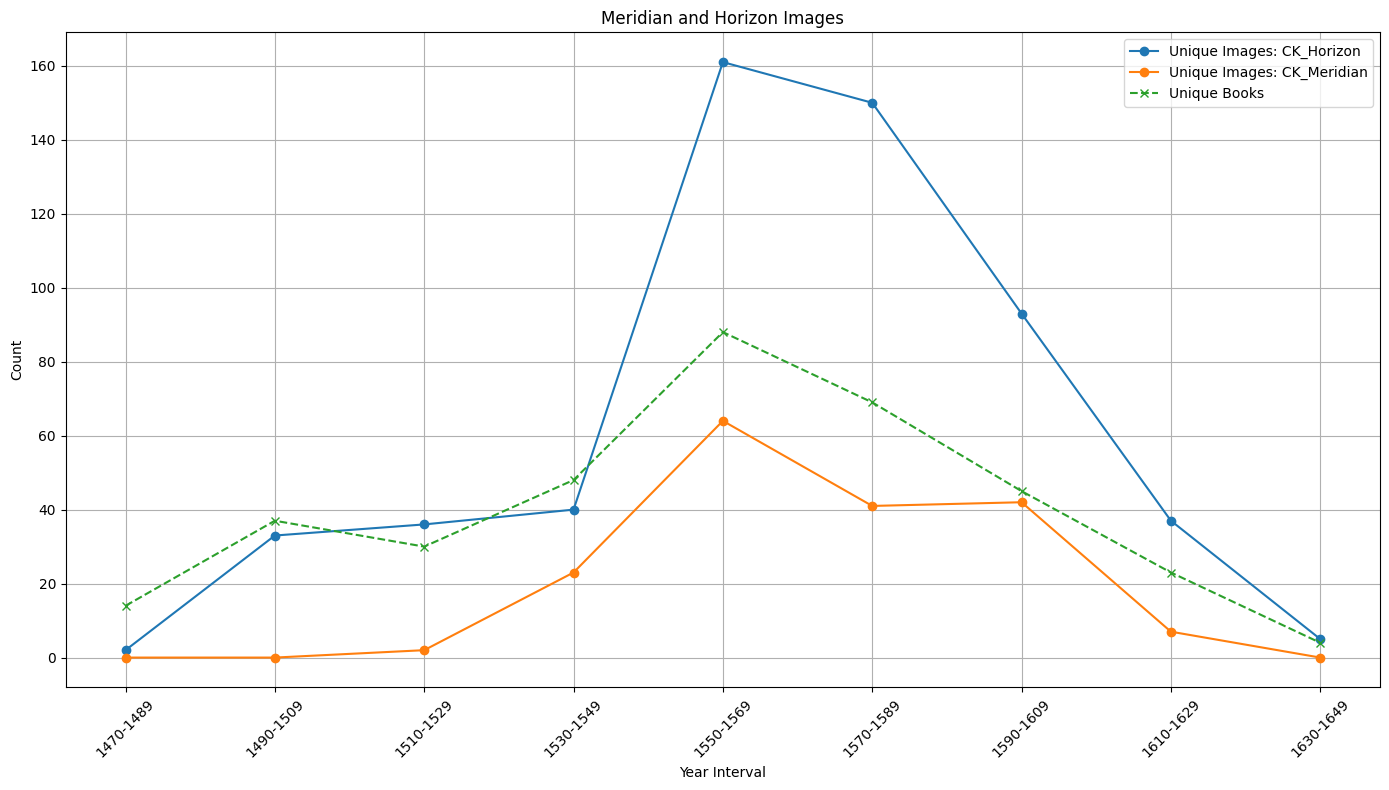

In [17]:
#comparison of different content keywords in celestial circles df

#including armillary sphere images: but only those included in these content groups! there is a big difference from all the armillary sphere content group that comes from other contexts as well.

# Ensure the year column is of integer type
df['year'] = df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the images DataFrame
df['interval'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Define keywords
keywords = [
    'CK_Horizon', 'CK_Meridian'
]

# Prepare a DataFrame for each keyword
keyword_dfs = {}
for keyword in keywords:
    # Create a boolean mask for the keyword
    mask = df['cks'].apply(lambda x: keyword in x)
    
    # Filter the DataFrame based on the mask
    filtered_df = df[mask]
    
    # Count unique images per interval for this keyword
    unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
    unique_images_per_interval.columns = ['interval', f'unique_images_{keyword}']
    
    keyword_dfs[keyword] = unique_images_per_interval

# Merge all keyword DataFrames on 'interval'
merged_keyword_df = pd.merge(keyword_dfs[keywords[0]], keyword_dfs[keywords[1]], on='interval', how='outer')
for keyword in keywords[2:]:
    merged_keyword_df = pd.merge(merged_keyword_df, keyword_dfs[keyword], on='interval', how='outer')

# Count unique books per interval
unique_books_per_interval = books.groupby('interval')['book'].nunique().reset_index()
unique_books_per_interval.columns = ['interval', 'unique_books']

# Merge the keyword DataFrame with the books DataFrame
final_df = pd.merge(merged_keyword_df, unique_books_per_interval, on='interval', how='outer')

# Plot the results
plt.figure(figsize=(14, 8))

# Plot each keyword
for keyword in keywords:
    plt.plot(final_df['interval'], final_df[f'unique_images_{keyword}'], label=f'Unique Images: {keyword}', marker='o')

# Plot unique books
plt.plot(final_df['interval'], final_df['unique_books'], label='Unique Books', marker='x', linestyle='--')

plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.title('Meridian and Horizon Images')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\867461491.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\867461491.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\867461491.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=F

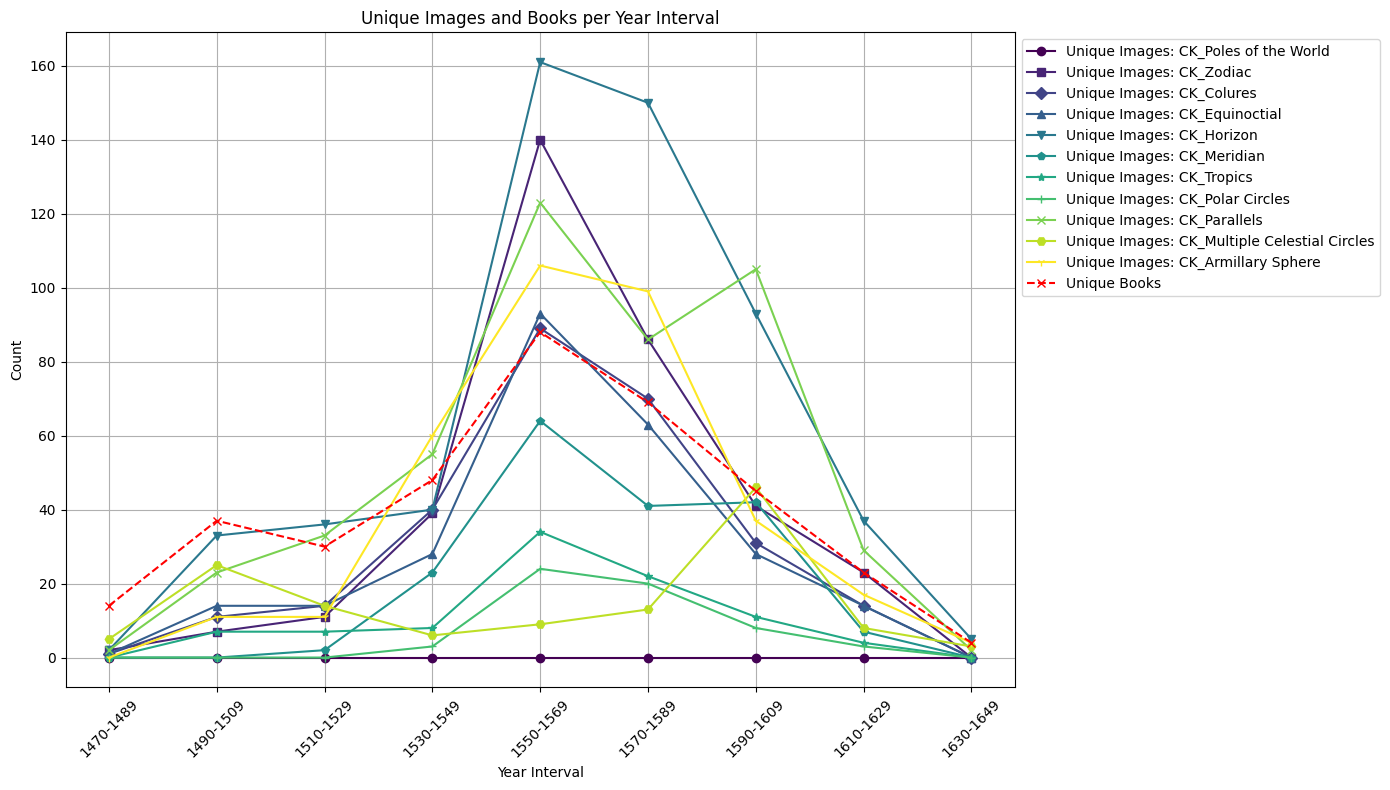

In [16]:
#a different graph for the different content groups, better differentiation of the lines (colors and shapes)

import numpy as np

# Ensure the year column is of integer type
df['year'] = df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the images DataFrame
df['interval'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Define keywords
keywords = [
    'CK_Poles of the World', 'CK_Zodiac', 'CK_Colures', 'CK_Equinoctial',
    'CK_Horizon', 'CK_Meridian', 'CK_Tropics', 'CK_Polar Circles',
    'CK_Parallels', 'CK_Multiple Celestial Circles', 'CK_Armillary Sphere'
]

# Prepare a DataFrame for each keyword
keyword_dfs = {}
for keyword in keywords:
    # Create a boolean mask for the keyword
    mask = df['cks'].apply(lambda x: keyword in x)
    
    # Filter the DataFrame based on the mask
    filtered_df = df[mask]
    
    # Count unique images per interval for this keyword
    unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
    unique_images_per_interval.columns = ['interval', f'unique_images_{keyword}']
    
    keyword_dfs[keyword] = unique_images_per_interval

# Merge all keyword DataFrames on 'interval'
merged_keyword_df = pd.merge(keyword_dfs[keywords[0]], keyword_dfs[keywords[1]], on='interval', how='outer')
for keyword in keywords[2:]:
    merged_keyword_df = pd.merge(merged_keyword_df, keyword_dfs[keyword], on='interval', how='outer')

# Count unique books per interval
unique_books_per_interval = books.groupby('interval')['book'].nunique().reset_index()
unique_books_per_interval.columns = ['interval', 'unique_books']

# Merge the keyword DataFrame with the books DataFrame
final_df = pd.merge(merged_keyword_df, unique_books_per_interval, on='interval', how='outer')

# Define a list of colors and markers
colors = plt.cm.viridis(np.linspace(0, 1, len(keywords)))  # Define color map
markers_list = ['o', 's', 'D', '^', 'v', 'p', '*', '+', 'x', 'H', '1']

# Plot the results
plt.figure(figsize=(14, 8))

# Plot each keyword
for idx, keyword in enumerate(keywords):
    plt.plot(final_df['interval'], final_df[f'unique_images_{keyword}'], 
             label=f'Unique Images: {keyword}', 
             marker=markers_list[idx % len(markers_list)], 
             color=colors[idx % len(colors)])

# Plot unique books
plt.plot(final_df['interval'], final_df['unique_books'], 
         label='Unique Books', marker='x', linestyle='--', color='red')

plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.title('Unique Images and Books per Year Interval')
plt.xticks(rotation=45)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\3152767995.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\3152767995.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\3152767995.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observe

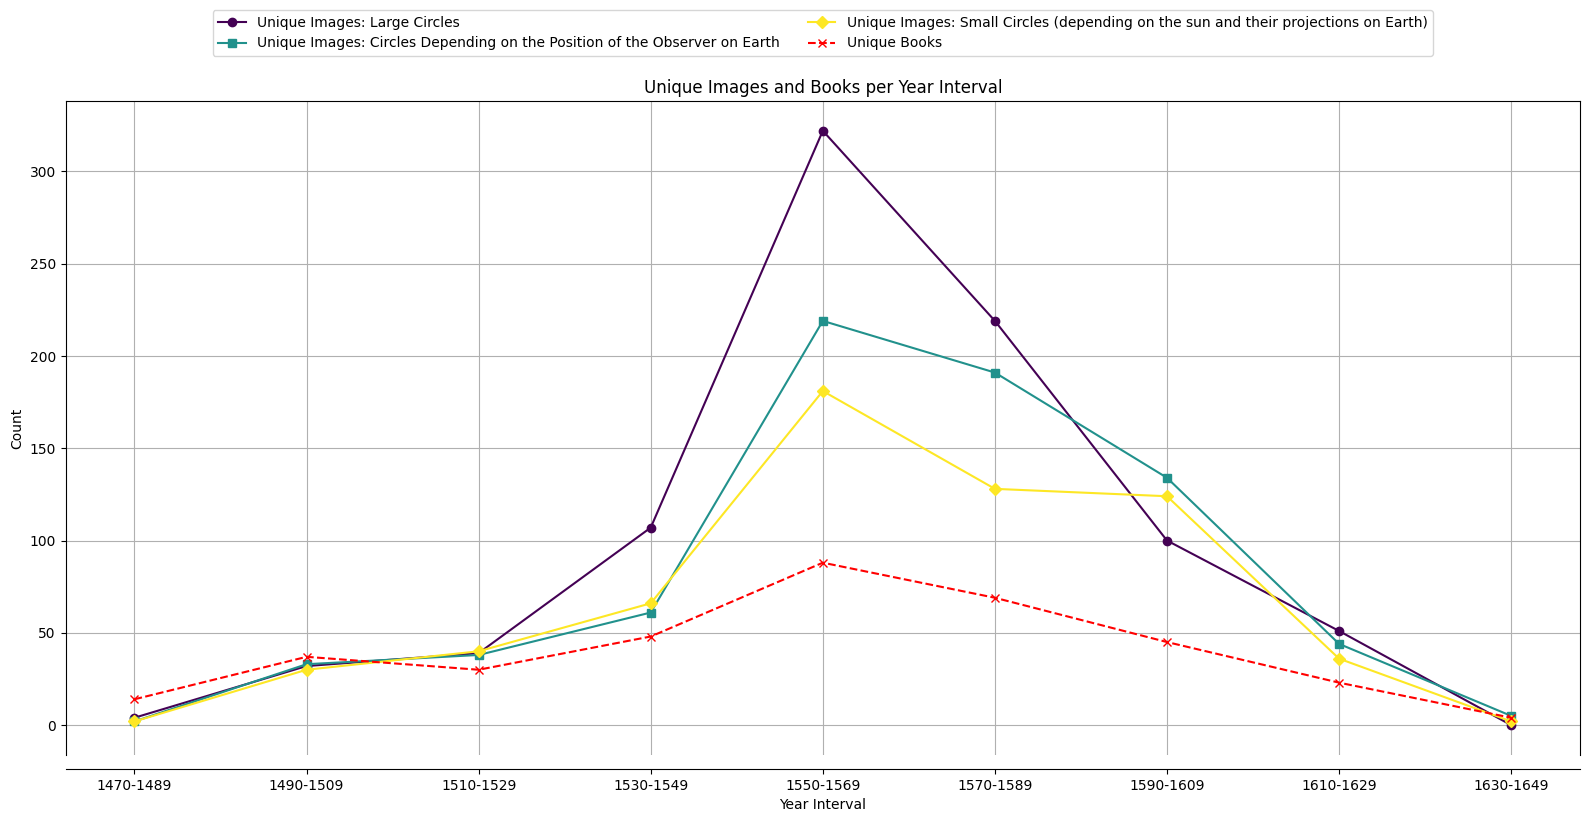

In [17]:
# Define new keyword groups
keyword_groups = {
    'Large Circles': ['CK_Zodiac', 'CK_Poles of the World', 'CK_Colures', 'CK_Equinoctial'],
    'Circles Depending on the Position of the Observer on Earth': ['CK_Horizon', 'CK_Meridian'],
    'Small Circles (depending on the sun and their projections on Earth)': ['CK_Parallels', 'CK_Tropics', 'CK_Polar Circles'],
}

# Prepare a DataFrame for each group
group_dfs = {}
for group, keywords in keyword_groups.items():
    # Create a boolean mask for each keyword group
    mask = df['cks'].apply(lambda x: any(keyword in x for keyword in keywords))
    
    # Filter the DataFrame based on the mask
    filtered_df = df[mask]
    
    # Count unique images per interval for this group
    unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
    unique_images_per_interval.columns = ['interval', f'unique_images_{group}']
    
    group_dfs[group] = unique_images_per_interval

# Merge all group DataFrames on 'interval'
merged_group_df = pd.merge(group_dfs[list(keyword_groups.keys())[0]], group_dfs[list(keyword_groups.keys())[1]], on='interval', how='outer')
for group in list(keyword_groups.keys())[2:]:
    merged_group_df = pd.merge(merged_group_df, group_dfs[group], on='interval', how='outer')

# Count unique books per interval
unique_books_per_interval = books.groupby('interval')['book'].nunique().reset_index()
unique_books_per_interval.columns = ['interval', 'unique_books']

# Merge the group DataFrame with the books DataFrame
final_df = pd.merge(merged_group_df, unique_books_per_interval, on='interval', how='outer')

# Define a list of colors and markers
colors = plt.cm.viridis(np.linspace(0, 1, len(keyword_groups)))  # Define color map
markers_list = ['o', 's', 'D', '^']

# Plot the results
plt.figure(figsize=(16, 8))  # Increase figure width for better visibility

# Plot each keyword group
for idx, (group, keywords) in enumerate(keyword_groups.items()):
    plt.plot(final_df['interval'], final_df[f'unique_images_{group}'], 
             label=f'Unique Images: {group}', 
             marker=markers_list[idx % len(markers_list)], 
             color=colors[idx % len(colors)])

# Plot unique books
plt.plot(final_df['interval'], final_df['unique_books'], 
         label='Unique Books', marker='x', linestyle='--', color='red')

plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.title('Unique Images and Books per Year Interval')

# Rotate x-axis labels and align them to the right
plt.xticks(rotation=45, ha='right')

# Move the x-axis outward to avoid overlap
ax = plt.gca()  # Get current axis
ax.spines['bottom'].set_position(('outward', 10))  # Adjust the x-axis position

# Adjust margins to make sure the legend fits inside the plot
plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.3)  # Adjust bottom margin for x-axis labels

# Place the legend inside the plot, above the lines
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)  # Position the legend inside the plot area, above the lines

plt.grid(True)
plt.tight_layout()  # Adjust layout to fit the plot and labels
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\1585268226.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\1585268226.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\1585268226.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observe

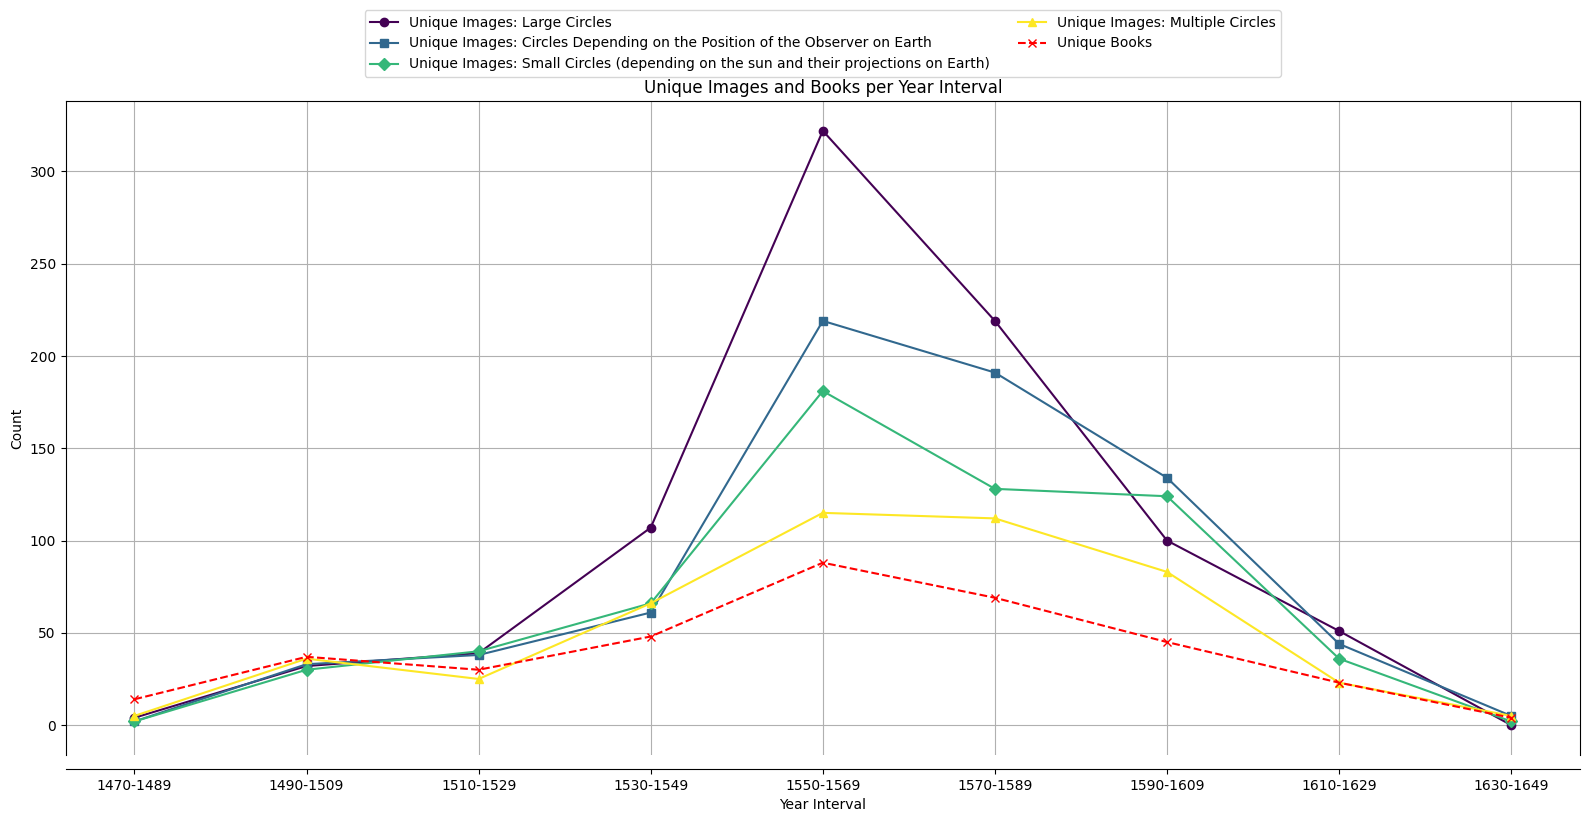

In [18]:
# Define new keyword groups
keyword_groups = {
    'Large Circles': ['CK_Zodiac', 'CK_Poles of the World', 'CK_Colures', 'CK_Equinoctial'],
    'Circles Depending on the Position of the Observer on Earth': ['CK_Horizon', 'CK_Meridian'],
    'Small Circles (depending on the sun and their projections on Earth)': ['CK_Parallels', 'CK_Tropics', 'CK_Polar Circles'],
    'Multiple Circles': ['CK_Multiple Celestial Circles', 'CK_Armillary Sphere']
}

# Prepare a DataFrame for each group
group_dfs = {}
for group, keywords in keyword_groups.items():
    # Create a boolean mask for each keyword group
    mask = df['cks'].apply(lambda x: any(keyword in x for keyword in keywords))
    
    # Filter the DataFrame based on the mask
    filtered_df = df[mask]
    
    # Count unique images per interval for this group
    unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
    unique_images_per_interval.columns = ['interval', f'unique_images_{group}']
    
    group_dfs[group] = unique_images_per_interval

# Merge all group DataFrames on 'interval'
merged_group_df = pd.merge(group_dfs[list(keyword_groups.keys())[0]], group_dfs[list(keyword_groups.keys())[1]], on='interval', how='outer')
for group in list(keyword_groups.keys())[2:]:
    merged_group_df = pd.merge(merged_group_df, group_dfs[group], on='interval', how='outer')

# Count unique books per interval
unique_books_per_interval = books.groupby('interval')['book'].nunique().reset_index()
unique_books_per_interval.columns = ['interval', 'unique_books']

# Merge the group DataFrame with the books DataFrame
final_df = pd.merge(merged_group_df, unique_books_per_interval, on='interval', how='outer')

# Define a list of colors and markers
colors = plt.cm.viridis(np.linspace(0, 1, len(keyword_groups)))  # Define color map
markers_list = ['o', 's', 'D', '^']

# Plot the results
plt.figure(figsize=(16, 8))  # Increase figure width for better visibility

# Plot each keyword group
for idx, (group, keywords) in enumerate(keyword_groups.items()):
    plt.plot(final_df['interval'], final_df[f'unique_images_{group}'], 
             label=f'Unique Images: {group}', 
             marker=markers_list[idx % len(markers_list)], 
             color=colors[idx % len(colors)])

# Plot unique books
plt.plot(final_df['interval'], final_df['unique_books'], 
         label='Unique Books', marker='x', linestyle='--', color='red')

plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.title('Unique Images and Books per Year Interval')

# Rotate x-axis labels and align them to the right
plt.xticks(rotation=45, ha='right')

# Move the x-axis outward to avoid overlap
ax = plt.gca()  # Get current axis
ax.spines['bottom'].set_position(('outward', 10))  # Adjust the x-axis position

# Adjust margins to make sure the legend fits inside the plot
plt.subplots_adjust(left=0.1, right=0.9, top=0.85, bottom=0.3)  # Adjust bottom margin for x-axis labels

# Place the legend inside the plot, above the lines
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)  # Position the legend inside the plot area, above the lines

plt.grid(True)
plt.tight_layout()  # Adjust layout to fit the plot and labels
plt.show()


In [19]:
#creating a deperate df from armillary sphere content group

# Ensure 'cks' is treated as a string
df['cks'] = df['cks'].astype(str)

# Create a boolean mask where 'CK_Armillary Sphere' is in the comma-separated lists in 'cks'
mask = df['cks'].str.contains(r'\bCK_Armillary Sphere\b', case=False, na=False)

# Filter the DataFrame based on the mask
armillary_sphere = df[mask]

armillary_sphere

,images,cluster_name,cks,book,bid,part_or_adaption,part_or_adaption_label,type_label,custom_identifier,place,year,flag,interval
169,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00570,CK_Armillary Sphere,http://sphaera.mpiwg-berlin.mpg.de/id/item/91f...,1925,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Annotated, Content",322,Venice,1490,nan,1490-1509
330,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00570,CK_Armillary Sphere,http://sphaera.mpiwg-berlin.mpg.de/id/item/b49...,1926,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Anonymous commentary (foeliciter inchoat),"Content, Annotated",322,Venice,1491,nan,1490-1509
640,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00514,CK_Armillary Sphere,http://sphaera.mpiwg-berlin.mpg.de/id/item/0ad...,2091,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Content, Original Part",100,Wittenberg,1531,nan,1530-1549
643,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01508,"CK_Elevation of the Pole, CK_Armillary Sphere",http://sphaera.mpiwg-berlin.mpg.de/id/item/0ad...,2091,http://sphaera.mpiwg-berlin.mpg.de/id/part/c61...,Tractatus de sphaera,"Content, Original Part",100,Wittenberg,1531,nan,1530-1549
668,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_01768,CK_Armillary Sphere,http://sphaera.mpiwg-berlin.mpg.de/id/item/0d5...,1642,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Tractatus de sphaera,"Annotated, Content",229,Cologne,1508,,1490-1509
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20533,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00255,"CK_Armillary Sphere, CK_Zodiac",http://sphaera.mpiwg-berlin.mpg.de/id/item/662...,2254,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Commentary on Scribonius's Isagoge by Palthenius,"Content, Annotated",663,Frankfurt (Main),1600,nan,1590-1609
20534,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00514,CK_Armillary Sphere,http://sphaera.mpiwg-berlin.mpg.de/id/item/662...,2254,http://sphaera.mpiwg-berlin.mpg.de/id/adaption...,Commentary on Scribonius's Isagoge by Palthenius,"Content, Annotated",663,Frankfurt (Main),1600,nan,1590-1609
20760,http://dev.sphaera.mpiwg-berlin.mpg.de/contain...,SAC_SIL_00514,CK_Armillary Sphere,http://sphaera.mpiwg-berlin.mpg.de/id/item/237...,2271,http://sphaera.mpiwg-berlin.mpg.de/id/part/1d1...,Blebel's four books on the Sphere,"Original Part, Content",503,Wittenberg,1576,nan,1570-1589
20868,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01975,"CK_Right and Oblique Sphere, CK_Armillary Sphere",http://sphaera.mpiwg-berlin.mpg.de/id/item/998...,2280,http://sphaera.mpiwg-berlin.mpg.de/id/part/56b...,Compendium on the Sphere by Cortes,"Original Part, Content",257,Seville,1556,nan,1550-1569


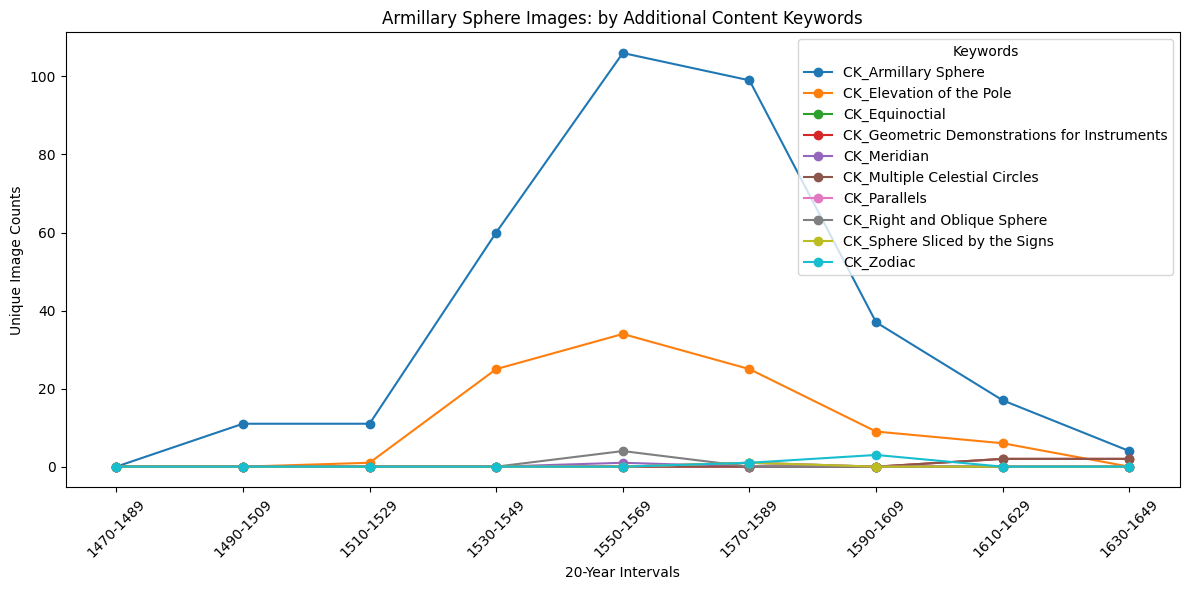

In [20]:
# Ensure the year column is of integer type
armillary_sphere.loc[:, 'year'] = armillary_sphere['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', 
          '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create twenty-year intervals
armillary_sphere.loc[:, 'interval'] = pd.cut(armillary_sphere['year'], bins=bins, labels=labels, right=False)

# Ensure 'cks' is treated as strings and split it into lists of keywords
armillary_sphere.loc[:, 'cks'] = armillary_sphere['cks'].astype(str).str.split(',')

# Explode the 'cks' column to have one keyword per row
armillary_sphere_exploded = armillary_sphere.explode('cks')

# Strip any whitespace from the keywords
armillary_sphere_exploded.loc[:, 'cks'] = armillary_sphere_exploded['cks'].str.strip()

# Group by interval and keyword, counting unique images
result = armillary_sphere_exploded.groupby(['interval', 'cks'], observed=False)['images'].nunique().reset_index()

# Pivot the table for better plotting
pivot_table = result.pivot(index='interval', columns='cks', values='images').fillna(0)

# Clear any existing figures
plt.close('all')  # Close all figures to ensure a fresh start

# Plotting
plt.figure(figsize=(12, 6))
for keyword in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[keyword], marker='o', label=keyword)

plt.title('Armillary Sphere Images: by Additional Content Keywords')
plt.xlabel('20-Year Intervals')
plt.ylabel('Unique Image Counts')

# Set x-ticks to use the labels and adjust rotation
plt.xticks(ticks=range(len(labels)), labels=labels, rotation=45)

# Place the legend inside the plot
plt.legend(title='Keywords', loc='upper right', frameon=True)

# Adjust layout to make it more compact
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\770751806.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\770751806.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  unique_books_per_interval = books.groupby('interval')['book'].nunique().reset_index()


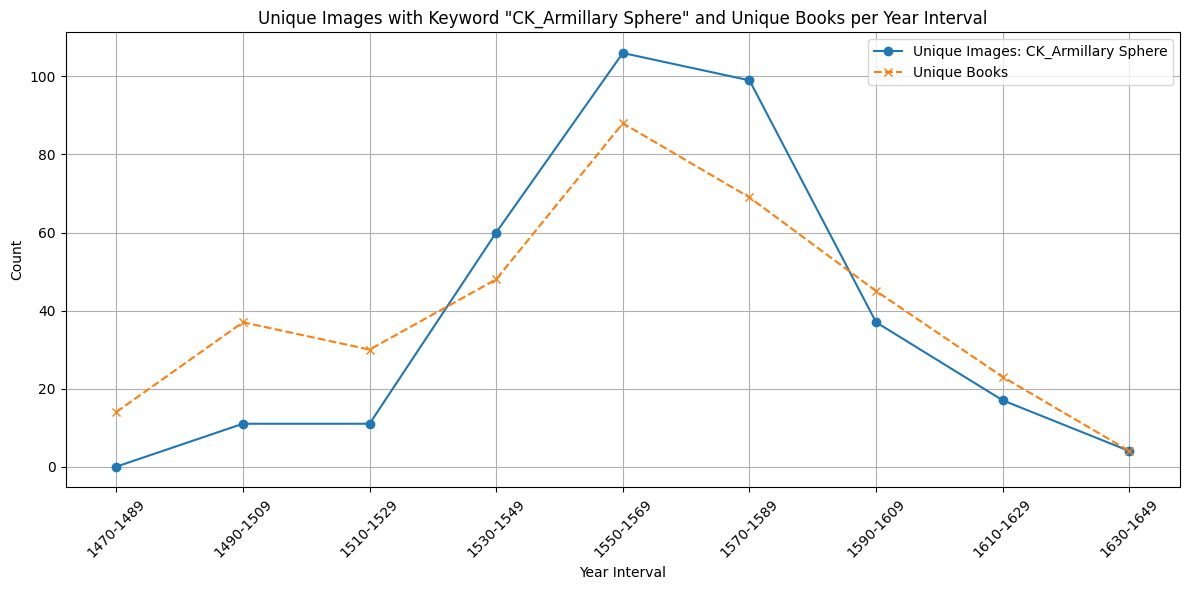

In [21]:
#examination of the content group armillary sphere (not only the images included in the celestial circles df as defined here)

# Ensure the year column is of integer type
df['year'] = df['year'].astype(int)
books['year'] = books['year'].astype(int)

# Define bins and labels for year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = [
    '1470-1489', '1490-1509', '1510-1529', '1530-1549',
    '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649'
]

# Add interval column to the images DataFrame
df['interval'] = pd.cut(df['year'], bins=bins, labels=labels, right=False)

# Add interval column to the books DataFrame
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Define the specific keyword
keyword = 'CK_Armillary Sphere'

# Create a boolean mask for the specific keyword
mask = df['cks'].apply(lambda x: keyword in x)

# Filter the DataFrame based on the mask
filtered_df = df[mask]

# Count unique images per interval for the specific keyword
unique_images_per_interval = filtered_df.groupby('interval')['images'].nunique().reset_index()
unique_images_per_interval.columns = ['interval', 'unique_images']

# Count unique books per interval
unique_books_per_interval = books.groupby('interval')['book'].nunique().reset_index()
unique_books_per_interval.columns = ['interval', 'unique_books']

# Merge the unique images and books DataFrames
final_df = pd.merge(unique_images_per_interval, unique_books_per_interval, on='interval', how='outer')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(final_df['interval'], final_df['unique_images'], label=f'Unique Images: {keyword}', marker='o')
plt.plot(final_df['interval'], final_df['unique_books'], label='Unique Books', marker='x', linestyle='--')

plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.title(f'Unique Images with Keyword "{keyword}" and Unique Books per Year Interval')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\3794368000.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celestial_circles['year'] = celestial_circles['year'].astype(int)
C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\3794368000.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celestial_circles['interval'] = pd.cut(celestial_circles['year'], bins=bins, labels=labels, right=False)
C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\3794368000.py:13: FutureWarning: The default of observed=False is

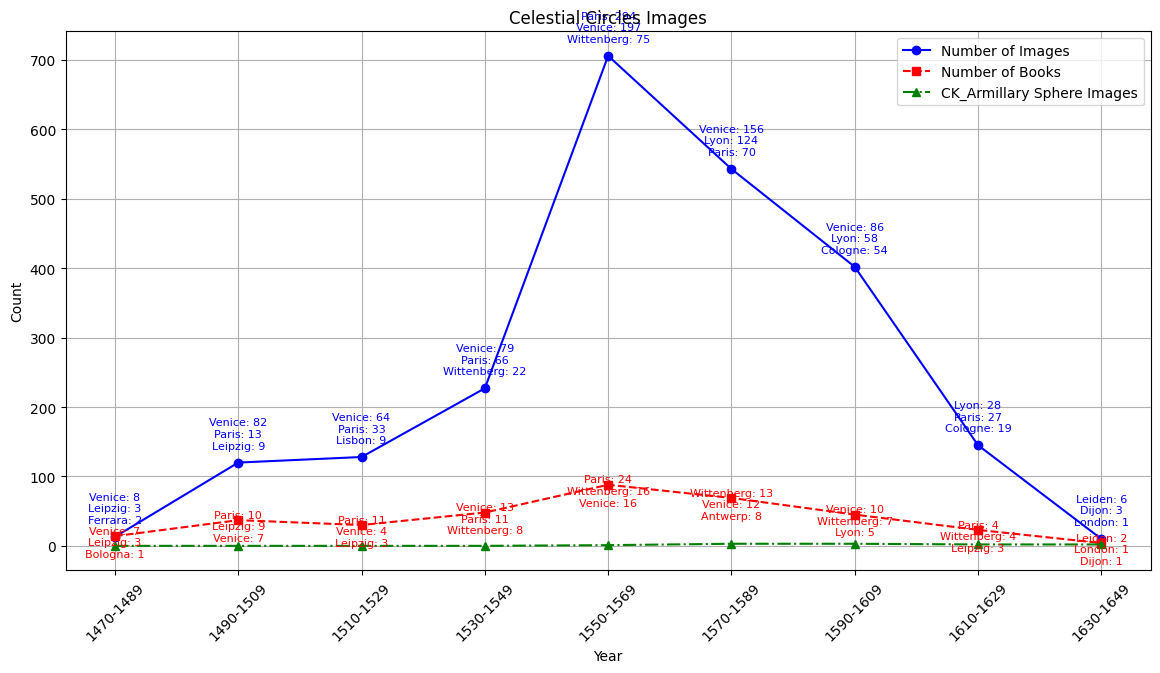

In [22]:
# Ensure the 'year' column is of type int
celestial_circles['year'] = celestial_circles['year'].astype(int)

books['year'] = books['year'].astype(int)# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals in both DataFrames
celestial_circles['interval'] = pd.cut(celestial_circles['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Group by interval and count unique images
unique_images = celestial_circles.groupby('interval')['images'].nunique()

# Group by interval and count the number of books
books_count = books.groupby('interval').size()

# Function to get the top three places with the most unique images for each interval
def get_top_places_per_interval(interval):
    interval_df = celestial_circles[celestial_circles['interval'] == interval]
    top_places = interval_df.groupby('place')['images'].nunique().nlargest(3)
    return top_places

# Function to get the most common places for each interval in the books DataFrame
def get_most_common_places_per_interval(interval):
    interval_df = books[books['interval'] == interval]
    most_common_places = interval_df['place'].value_counts().head(3)
    return most_common_places

# Filter the celestial_circles DataFrame for images containing 'CK_Armillary Sphere'
armillary_sphere = celestial_circles[celestial_circles['cks'].str.contains('CK_Armillary Sphere', case=False, na=False)]

# Group by interval and count unique images containing 'CK_Armillary Sphere'
armillary_images = armillary_sphere.groupby('interval')['images'].nunique()

# Plot the results
plt.figure(figsize=(14, 7))

# Plot unique images by interval
plt.plot(unique_images.index, unique_images.values, marker='o', linestyle='-', color='blue', label='Number of Images')

# Plot number of books by interval
plt.plot(books_count.index, books_count.values, marker='s', linestyle='--', color='red', label='Number of Books')

# Plot unique images of 'CK_Armillary Sphere' by interval
plt.plot(armillary_images.index, armillary_images.values, marker='^', linestyle='-.', color='green', label='CK_Armillary Sphere Images')

# Add annotations for the top three places for unique images
#for interval in labels:
#    if interval in unique_images.index:
#        top_places = get_top_places_per_interval(interval)
#        annotation_text = '\n'.join([f'{place}: {count}' for place, count in top_places.items()])
        
        # Get the y-value for annotation
#       unique_image_count = unique_images.loc[interval]
                
        # Annotation for unique images line
#        plt.annotate(annotation_text, (interval, unique_image_count), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color='blue')

# Add annotations for the most common places for books
#for interval in labels:
#   if interval in books_count.index:
#       common_places = get_most_common_places_per_interval(interval)
#       annotation_text = '\n'.join([f'{place}: {count}' for place, count in common_places.items()])
#       
#       # Get the y-value for annotation
#       book_count = books_count.loc[interval]
#               
#       # Annotation for books line
#       plt.annotate(annotation_text, (interval, book_count), textcoords="offset points", xytext=(0, -15), ha='center', fontsize=8, color='red')

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Celestial Circles Images')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\3865447148.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celestial_circles['year'] = celestial_circles['year'].astype(int)
C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\3865447148.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celestial_circles['interval'] = pd.cut(celestial_circles['year'], bins=bins, labels=labels, right=False)
C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\3865447148.py:16: FutureWarning: The default of observed=False i

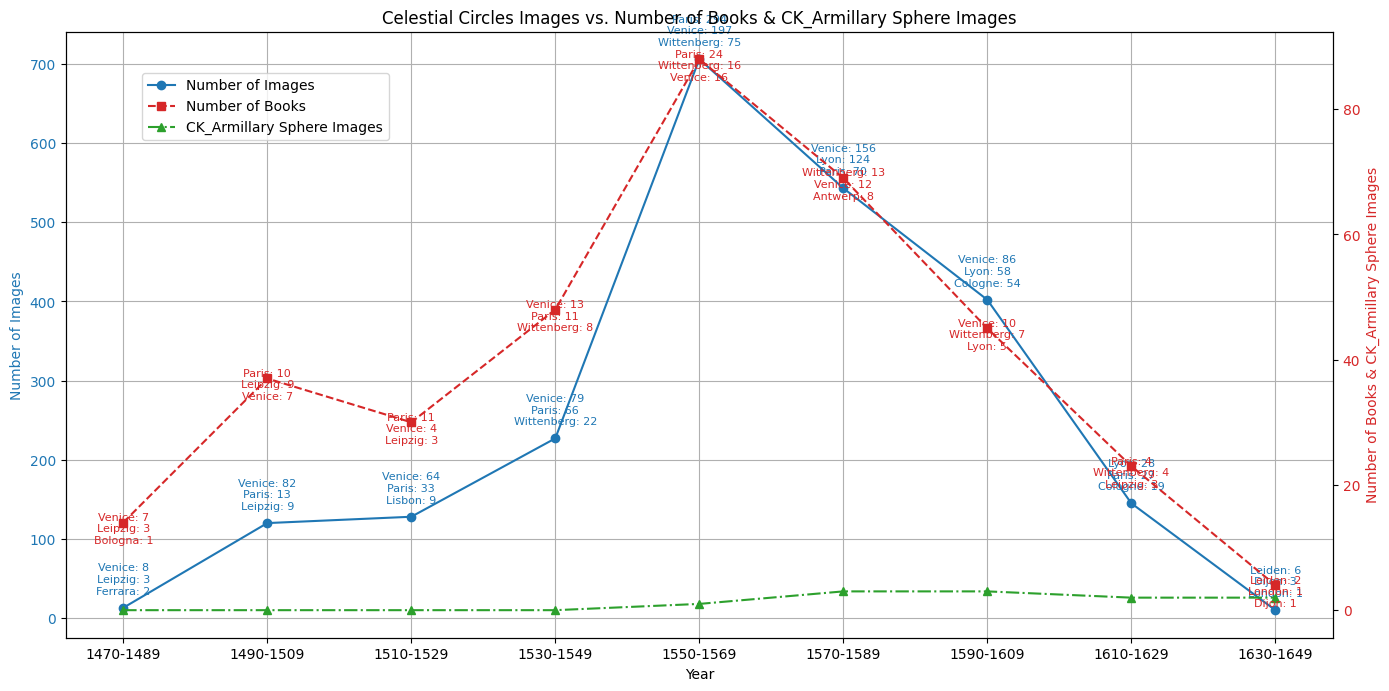

In [23]:
# Assuming 'celestial_circles' and 'books' DataFrames are already defined

# Ensure the 'year' column is of type int
celestial_circles['year'] = celestial_circles['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals in both DataFrames
celestial_circles['interval'] = pd.cut(celestial_circles['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Group by interval and count unique images
unique_images = celestial_circles.groupby('interval')['images'].nunique()

# Group by interval and count the number of books
books_count = books.groupby('interval').size()

# Function to get the top three places with the most unique images for each interval
def get_top_places_per_interval(interval):
    interval_df = celestial_circles[celestial_circles['interval'] == interval]
    top_places = interval_df.groupby('place')['images'].nunique().nlargest(3)
    return top_places

# Function to get the most common places for each interval in the books DataFrame
def get_most_common_places_per_interval(interval):
    interval_df = books[books['interval'] == interval]
    most_common_places = interval_df['place'].value_counts().head(3)
    return most_common_places

# Filter the celestial_circles DataFrame for images containing 'CK_Armillary Sphere'
armillary_sphere = celestial_circles[celestial_circles['cks'].str.contains('CK_Armillary Sphere', case=False, na=False)]

# Group by interval and count unique images containing 'CK_Armillary Sphere'
armillary_images = armillary_sphere.groupby('interval')['images'].nunique()

# Plot the results
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot unique images by interval on the primary y-axis
color = 'tab:blue'
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Images', color=color)
ax1.plot(unique_images.index, unique_images.values, marker='o', linestyle='-', color=color, label='Number of Images')
ax1.tick_params(axis='y', labelcolor=color)

# Add annotations for the top three places for unique images
for interval in labels:
    if interval in unique_images.index:
        top_places = get_top_places_per_interval(interval)
        annotation_text = '\n'.join([f'{place}: {count}' for place, count in top_places.items()])
        
        # Get the y-value for annotation
        unique_image_count = unique_images.loc[interval]
                
        # Annotation for unique images line
        ax1.annotate(annotation_text, (interval, unique_image_count), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=8, color=color)

# Instantiate a second y-axis that shares the same x-axis
ax2 = ax1.twinx()  

# Plot number of books and CK_Armillary Sphere images by interval on the secondary y-axis
color = 'tab:red'
ax2.set_ylabel('Number of Books & CK_Armillary Sphere Images', color=color)  
ax2.plot(books_count.index, books_count.values, marker='s', linestyle='--', color=color, label='Number of Books')
ax2.plot(armillary_images.index, armillary_images.values, marker='^', linestyle='-.', color='tab:green', label='CK_Armillary Sphere Images')
ax2.tick_params(axis='y', labelcolor=color)

# Add annotations for the most common places for books
for interval in labels:
    if interval in books_count.index:
        common_places = get_most_common_places_per_interval(interval)
        annotation_text = '\n'.join([f'{place}: {count}' for place, count in common_places.items()])
        
        # Get the y-value for annotation
        book_count = books_count.loc[interval]
                
        # Annotation for books line
        ax2.annotate(annotation_text, (interval, book_count), textcoords="offset points", xytext=(0, -15), ha='center', fontsize=8, color=color)

# Adding legend and grid
fig.tight_layout()  
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
ax1.grid(True)
plt.title('Celestial Circles Images vs. Number of Books & CK_Armillary Sphere Images')
plt.xticks(rotation=45)
plt.show()


In [24]:
# Path to the Excel file
excel_file_path = 'C:\\Users\\nogas\\Image_data\\celestial_circles.xlsx'

# Load the Excel file into a DataFrame
excel_data = pd.read_excel(excel_file_path)

celestial_circles_visual = pd.merge(celestial_circles, excel_data, on='cluster_name', how='left')

celestial_circles_visual

,images,cluster_name,cks,bid,part_id,year,place,interval,3D,human figures,...,multiple moments,multiple perspectives,color,multiple circles,"decorated or stars, tail, scales",picture,terraqueous globe,diagram,small circles representing mutual three dimensional motion,symbol
0,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00548,CK_Multiple Celestial Circles,2201,100,1489,Leipzig,1470-1489,yes,no,...,no,no,no,yes,no,no,no,no,no,no
1,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00231,CK_Tropics,1624,231,1494,Paris,1490-1509,no,no,...,no,no,no,no,no,no,no,no,no,no
2,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00231,CK_Tropics,1624,231,1494,Paris,1490-1509,no,no,...,no,no,no,no,no,no,no,no,no,no
3,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00287,CK_Parallels,1624,231,1494,Paris,1490-1509,no,no,...,no,no,no,no,no,no,no,no,no,no
4,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00355,CK_Parallels,1624,231,1494,Paris,1490-1509,no,no,...,no,no,no,no,no,no,no,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2289,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01924,CK_Meridian,2278,295,1601,Venice,1590-1609,no,no,...,no,no,no,no,yes,no,no,no,no,no
2290,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_02104,"CK_Five Zones, CK_Parallels",2278,295,1601,Venice,1590-1609,yes,no,...,no,no,no,yes,no,no,no,no,no,no
2291,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01872,"CK_Horizon, CK_Right and Oblique Sphere",2278,295,1601,Venice,1590-1609,no,yes,...,no,yes,yes,no,no,no,no,no,no,no
2292,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01489,CK_Multiple Celestial Circles,2278,295,1601,Venice,1590-1609,yes,no,...,no,no,no,yes,yes,no,yes,no,no,no


In [25]:
#visual plots

C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\1795258687.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\1795258687.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\1795258687.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to r

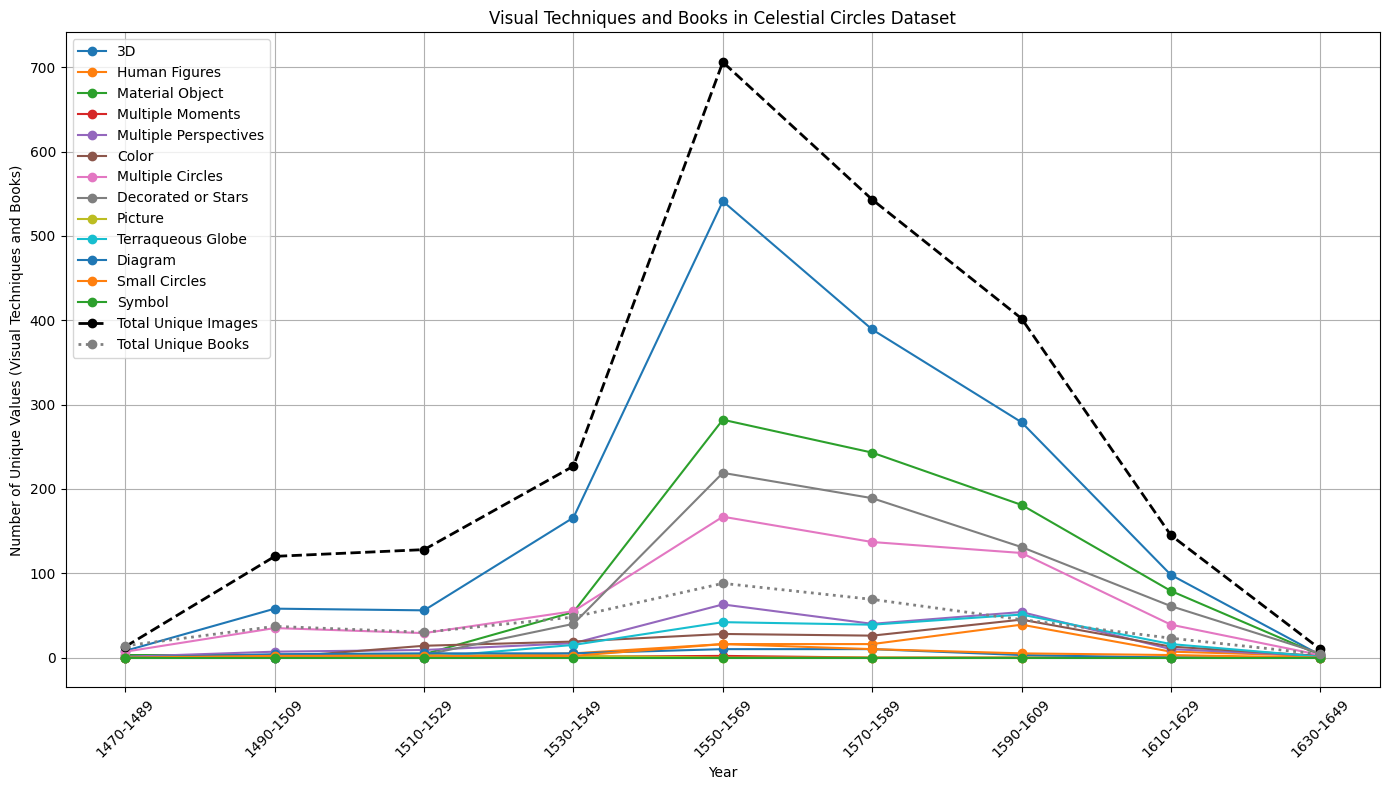

In [26]:
# Convert 'year' to int
celestial_circles_visual['year'] = celestial_circles_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
celestial_circles_visual['interval'] = pd.cut(celestial_circles_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = celestial_circles_visual[celestial_circles_visual[column_name] == value]
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
human_figures = count_unique_images_by_column('human figures', 'yes')
material_object = count_unique_images_by_column('material object (double lines)', 'yes')
multiple_moments = count_unique_images_by_column('multiple moments', 'yes')
multiple_perspectives = count_unique_images_by_column('multiple perspectives', 'yes')
color = count_unique_images_by_column('color', 'yes')
multiple_circles = count_unique_images_by_column('multiple circles', 'yes')
decorated_or_stars = count_unique_images_by_column('decorated or stars, tail, scales', 'yes')
picture = count_unique_images_by_column('picture', 'yes')
terraqueous_globe = count_unique_images_by_column('terraqueous globe', 'yes')
diagram = count_unique_images_by_column('diagram', 'yes')
small_circles = count_unique_images_by_column('small circles representing mutual three dimensional motion', 'yes')
symbol = count_unique_images_by_column('symbol', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
    '3D': three_dimensions_effect,
    'Human Figures': human_figures,
    'Material Object': material_object,
    'Multiple Moments': multiple_moments,
    'Multiple Perspectives': multiple_perspectives,
    'Color': color,
    'Multiple Circles': multiple_circles,
    'Decorated or Stars': decorated_or_stars,
    'Picture': picture,
    'Terraqueous Globe': terraqueous_globe,
    'Diagram': diagram,
    'Small Circles': small_circles,
    'Symbol': symbol
})

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)
total_unique_images = celestial_circles_visual.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique images and total unique books
ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unique Values (Visual Techniques and Books)')
ax.set_title('Visual Techniques and Books in Celestial Circles Dataset')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\692782227.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\692782227.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\692782227.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to reta

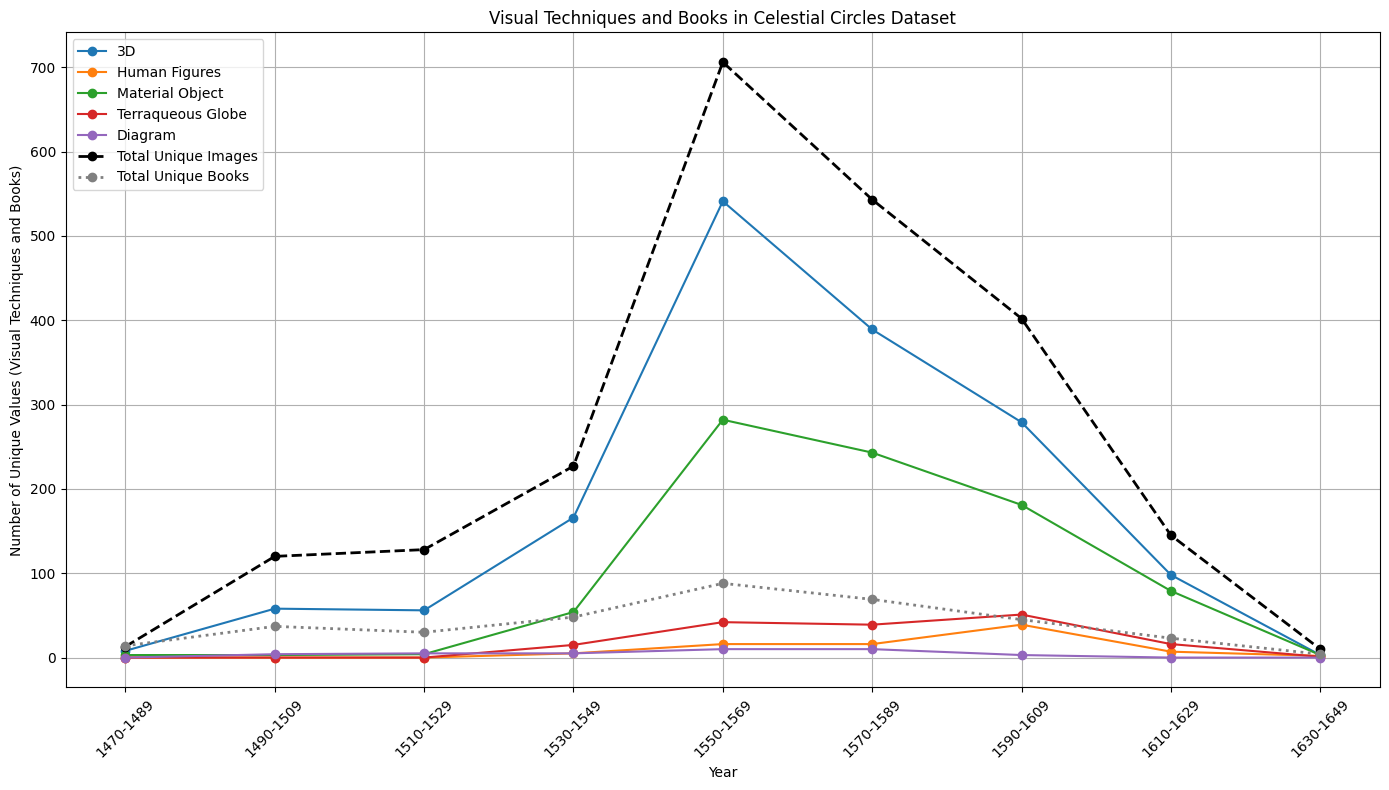

In [27]:
# Convert 'year' to int
celestial_circles_visual['year'] = celestial_circles_visual['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
celestial_circles_visual['interval'] = pd.cut(celestial_circles_visual['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = celestial_circles_visual[celestial_circles_visual[column_name] == value]
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
three_dimensions_effect = count_unique_images_by_column('3D', 'yes')
human_figures = count_unique_images_by_column('human figures', 'yes')
material_object = count_unique_images_by_column('material object (double lines)', 'yes')
multiple_moments = count_unique_images_by_column('multiple moments', 'yes')
multiple_perspectives = count_unique_images_by_column('multiple perspectives', 'yes')
color = count_unique_images_by_column('color', 'yes')
multiple_circles = count_unique_images_by_column('multiple circles', 'yes')
decorated_or_stars = count_unique_images_by_column('decorated or stars, tail, scales', 'yes')
picture = count_unique_images_by_column('picture', 'yes')
terraqueous_globe = count_unique_images_by_column('terraqueous globe', 'yes')
diagram = count_unique_images_by_column('diagram', 'yes')
small_circles = count_unique_images_by_column('small circles representing mutual three dimensional motion', 'yes')
symbol = count_unique_images_by_column('symbol', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
    '3D': three_dimensions_effect,
    'Human Figures': human_figures,
    'Material Object': material_object,
    'Terraqueous Globe': terraqueous_globe,
    'Diagram': diagram,
})

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)
total_unique_images = celestial_circles_visual.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique images and total unique books
ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of Unique Values (Visual Techniques and Books)')
ax.set_title('Visual Techniques and Books in Celestial Circles Dataset')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
# Path to the Excel file
excel_file_path = 'C:\\Users\\nogas\\Image_data\\corrected_celestial_circles.xlsx'

# Load the Excel file into a DataFrame
excel_data_2 = pd.read_excel(excel_file_path)

celestial_circles_3D = pd.merge(celestial_circles, excel_data_2, on='cluster_name', how='left')

celestial_circles_3D

,images,cluster_name,cks,bid,part_id,year,place,interval,3D decoration,3D main point,Unnamed: 3
0,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00548,CK_Multiple Celestial Circles,2201,100,1489,Leipzig,1470-1489,no,yes,NaN
1,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00231,CK_Tropics,1624,231,1494,Paris,1490-1509,no,no,NaN
2,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00231,CK_Tropics,1624,231,1494,Paris,1490-1509,no,no,NaN
3,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00287,CK_Parallels,1624,231,1494,Paris,1490-1509,no,no,NaN
4,http://db.sphaera.mpiwg-berlin.mpg.de/containe...,SAC_SIL_00355,CK_Parallels,1624,231,1494,Paris,1490-1509,no,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2289,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01924,CK_Meridian,2278,295,1601,Venice,1590-1609,no,no,NaN
2290,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_02104,"CK_Five Zones, CK_Parallels",2278,295,1601,Venice,1590-1609,no,yes,NaN
2291,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01872,"CK_Horizon, CK_Right and Oblique Sphere",2278,295,1601,Venice,1590-1609,no,no,NaN
2292,http://www.researchspace.org/ontology/ImageReg...,SAC_SIL_01489,CK_Multiple Celestial Circles,2278,295,1601,Venice,1590-1609,yes,yes,NaN


C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\1185169573.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\1185169573.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)
C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\1185169573.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to r

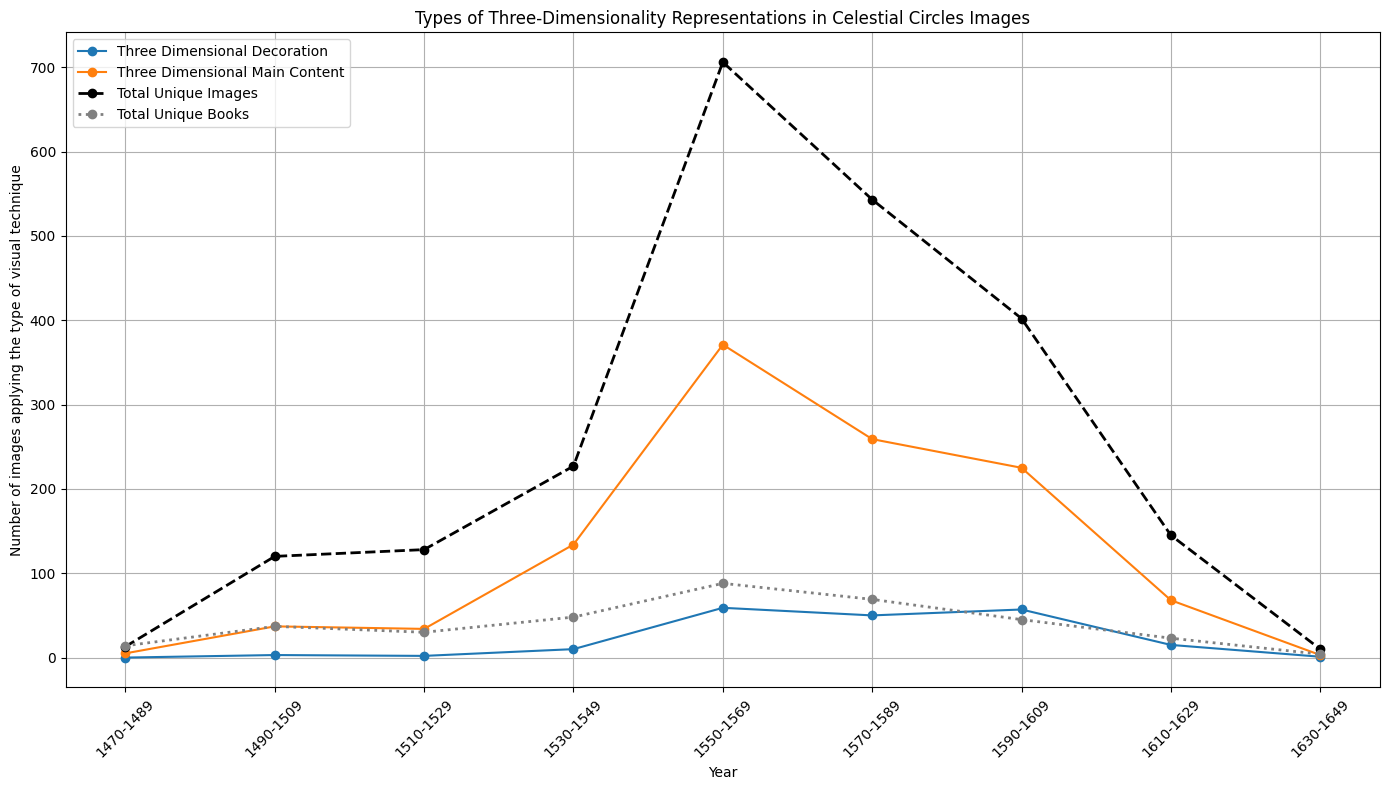

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'year' to int
celestial_circles_3D['year'] = celestial_circles_3D['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals
celestial_circles_3D['interval'] = pd.cut(celestial_circles_3D['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Function to count unique images by column
def count_unique_images_by_column(column_name, value):
    filtered_df = celestial_circles_3D[celestial_circles_3D[column_name] == value]
    return filtered_df.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Collect data with updated column names
three_dimensional_decoration = count_unique_images_by_column('3D decoration', 'yes')
three_dimensional_main_content = count_unique_images_by_column('3D main point', 'yes')

# Combine the data for lines
side_by_side_data = pd.DataFrame({
    'Three Dimensional Decoration': three_dimensional_decoration,
    'Three Dimensional Main Content': three_dimensional_main_content
})

# Calculate total unique books and images for each interval
total_unique_books_df = books.groupby('interval')['book'].nunique().reindex(labels, fill_value=0)
total_unique_images = celestial_circles_3D.groupby('interval')['images'].nunique().reindex(labels, fill_value=0)

# Plot lines with single y-axis
fig, ax = plt.subplots(figsize=(14, 8))

# Plot lines for each category on primary y-axis
for column in side_by_side_data.columns:
    ax.plot(labels, side_by_side_data[column], marker='o', linestyle='-', label=column)

# Plot lines for total unique images and total unique books
ax.plot(labels, total_unique_images, marker='o', linestyle='--', color='black', label='Total Unique Images', linewidth=2)
ax.plot(labels, total_unique_books_df, marker='o', linestyle=':', color='gray', label='Total Unique Books', linewidth=2)

# Formatting the plot
ax.set_xlabel('Year')
ax.set_ylabel('Number of images applying the type of visual technique')
ax.set_title('Types of Three-Dimensionality Representations in Celestial Circles Images')
ax.legend(loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\2049102893.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celestial_circles['year'] = celestial_circles['year'].astype(int)
C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\2049102893.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  celestial_circles['interval'] = pd.cut(celestial_circles['year'], bins=bins, labels=labels, right=False)
C:\Users\nogas\AppData\Local\Temp\ipykernel_11644\2049102893.py:18: FutureWarning: The default of observed=False i

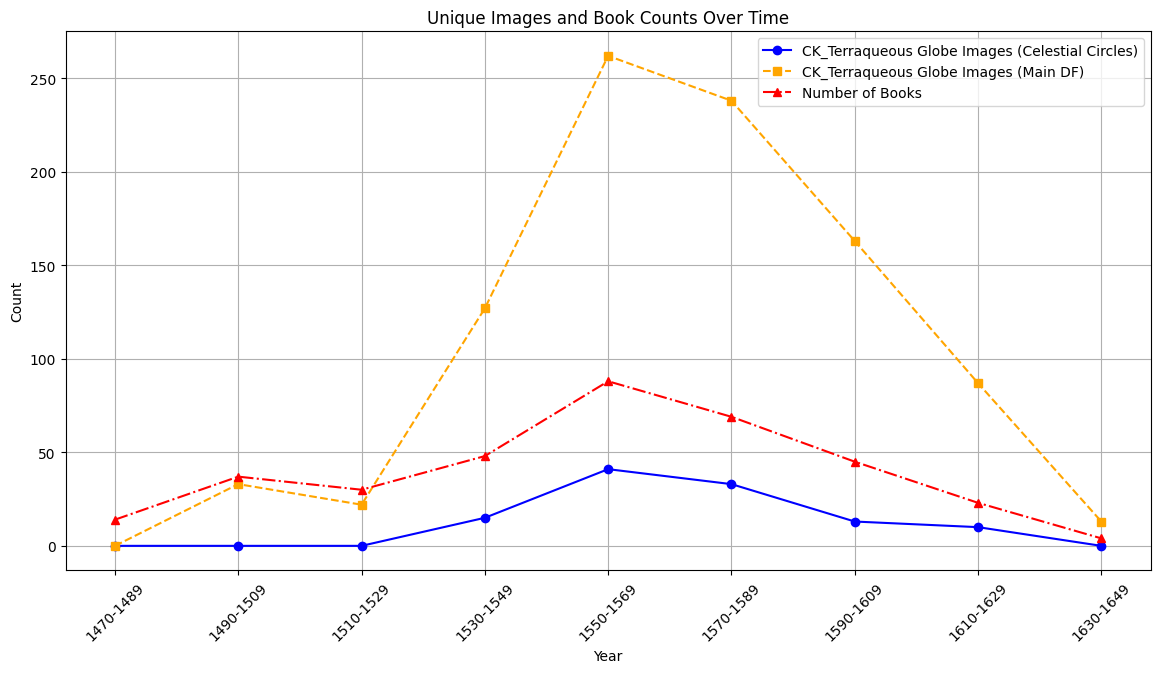

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'year' column is of type int
celestial_circles['year'] = celestial_circles['year'].astype(int)
books['year'] = books['year'].astype(int)

# Create 20-year intervals
bins = [1470, 1490, 1510, 1530, 1550, 1570, 1590, 1610, 1630, 1650]
labels = ['1470-1489', '1490-1509', '1510-1529', '1530-1549', '1550-1569', '1570-1589', '1590-1609', '1610-1629', '1630-1649']

# Create a new column for the 20-year intervals in both DataFrames
celestial_circles['interval'] = pd.cut(celestial_circles['year'], bins=bins, labels=labels, right=False)
books['interval'] = pd.cut(books['year'], bins=bins, labels=labels, right=False)

# Unique images with the keyword "CK_Terraqueous Globe" in celestial_circles
terraqueous_images_celestial = celestial_circles[celestial_circles['cks'].str.contains('CK_Terraqueous Globe', case=False, na=False)]
unique_terraqueous_images_celestial = terraqueous_images_celestial.groupby('interval')['images'].nunique()

# Unique images with the keyword "CK_Terraqueous Globe" in the main DataFrame df
# Assuming df is your main DataFrame, replace 'df' with your actual DataFrame name
terraqueous_images_df = df[df['cks'].str.contains('CK_Terraqueous Globe', case=False, na=False)]
unique_terraqueous_images_df = terraqueous_images_df.groupby('interval')['images'].nunique()

# Unique number of books by interval
books_count = books.groupby('interval').size()

# Plot the results
plt.figure(figsize=(14, 7))

# Plot unique images from celestial_circles with 'CK_Terraqueous Globe'
plt.plot(unique_terraqueous_images_celestial.index, unique_terraqueous_images_celestial.values, marker='o', linestyle='-', color='blue', label='CK_Terraqueous Globe Images (Celestial Circles)')

# Plot unique images from df with 'CK_Terraqueous Globe'
plt.plot(unique_terraqueous_images_df.index, unique_terraqueous_images_df.values, marker='s', linestyle='--', color='orange', label='CK_Terraqueous Globe Images (Main DF)')

# Plot number of books by interval
plt.plot(books_count.index, books_count.values, marker='^', linestyle='-.', color='red', label='Number of Books')

# Add labels and annotations if necessary
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Unique Images and Book Counts Over Time')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
